In [2]:
import torch
from src.dataset import test_dataset, test_dataloader

from src.model import UNET
from src.utils import display_images, display_comparison

model = UNET(channels=[3, 64, 128, 256, 512, 1024], out_channels=1)
model.load_state_dict(torch.load("mymodel.pth", map_location=torch.device("cpu")))
img, mask = test_dataset[451]

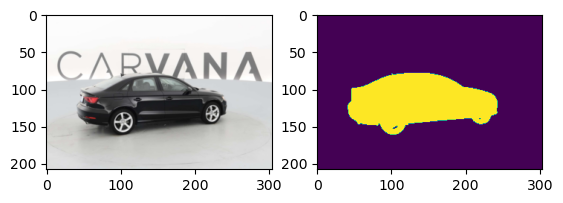

In [3]:
display_images(img,mask)

tensor([[[[-2.5766, -3.0256, -3.4027,  ..., -3.4109, -3.2876, -3.1552],
          [-2.9969, -3.5549, -3.4744,  ..., -3.2933, -3.4529, -3.2631],
          [-3.2417, -3.3182, -3.3320,  ..., -3.3572, -3.4724, -3.3557],
          ...,
          [-3.2391, -3.1997, -3.1822,  ..., -2.9620, -3.1868, -3.3304],
          [-2.9701, -3.2625, -3.3606,  ..., -3.3603, -3.7323, -3.1764],
          [-2.9114, -3.6109, -3.4201,  ..., -3.6248, -3.5184, -2.8297]]]],
       grad_fn=<ConvolutionBackward0>)
torch.Size([3, 208, 304])
torch.Size([1, 208, 304])


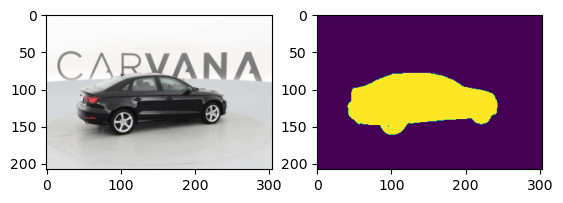

tensor(1.)

In [4]:
model.eval()

preds = model(torch.unsqueeze(img, 0))
print(preds)
preds = (torch.sigmoid(preds)>0.5).float()
print(img.shape)
print(preds[0,:,:,:].shape)
display_images(img, preds[0,:,:,:])
torch.max(mask)


In [5]:
import matplotlib.pyplot as plt

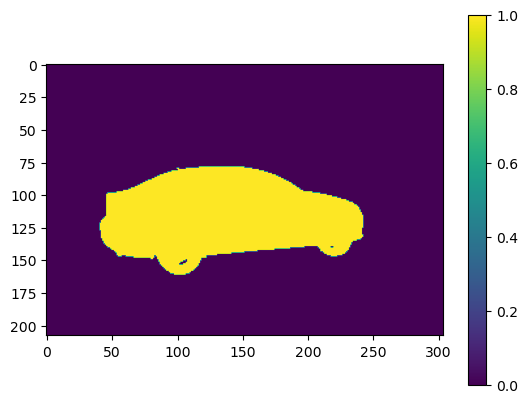

In [6]:
plt.imshow(mask[0,:,:])
plt.colorbar()
plt.show()